In [ ]:
import pandas as pd

# Load the CSV file
file_path = '/content/marketing_campaign.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,ID;Year_Birth;Education;Marital_Status;Income;Kidhome;Teenhome;Dt_Customer;Recency;MntWines;MntFruits;MntMeatProducts;MntFishProducts;MntSweetProducts;MntGoldProds;NumDealsPurchases;NumWebPurchases;NumCatalogPurchases;NumStorePurchases;NumWebVisitsMonth;AcceptedCmp3;AcceptedCmp4;AcceptedCmp5;AcceptedCmp1;AcceptedCmp2;Complain;Z_CostContact;Z_Revenue;Response
0,5524;1957;Graduation;Single;58138;0;0;2012-09-...
1,2174;1954;Graduation;Single;46344;1;1;2014-03-...
2,4141;1965;Graduation;Together;71613;0;0;2013-0...
3,6182;1984;Graduation;Together;26646;1;0;2014-0...
4,5324;1981;PhD;Married;58293;1;0;2014-01-19;94;...


In [ ]:
# Reload the file using the correct delimiter
df = pd.read_csv(file_path, delimiter=';')

# Display the first few rows of the dataset
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
# Split into control (Group A) and test (Group B) based on 'Response'
control_group = df[df['Response'] == 0]
test_group = df[df['Response'] == 1]

# Check the sizes of the two groups
len(control_group), len(test_group)


(1906, 334)

In [ ]:
from scipy import stats

# Perform a t-test on Income between the two groups
control_income = control_group['Income'].dropna()
test_income = test_group['Income'].dropna()

t_stat, p_value = stats.ttest_ind(control_income, test_income, equal_var=False)

t_stat, p_value


(-6.703212082164512, 5.713120815352263e-11)

In [ ]:
# Interpretation of the p-value
if p_value < 0.05:
    print("There is a statistically significant difference between the control and test groups.")
else:
    print("There is no statistically significant difference between the control and test groups.")


There is a statistically significant difference between the control and test groups.


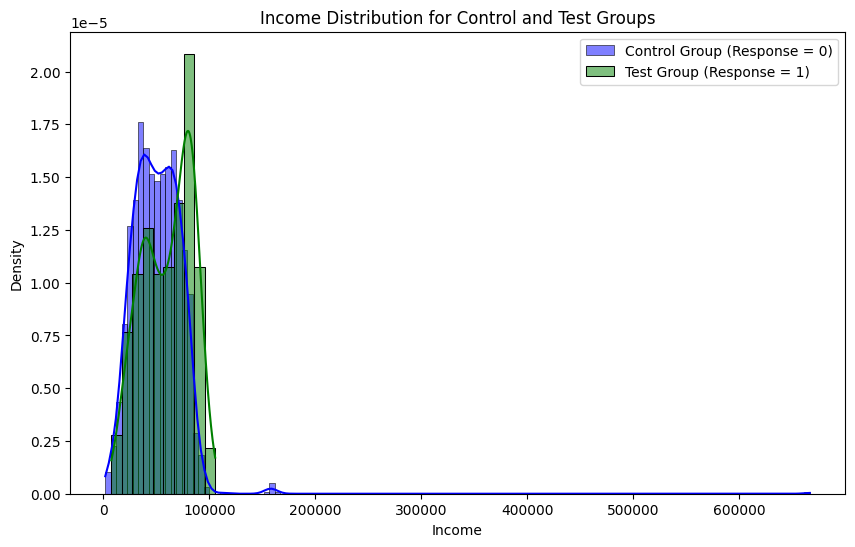

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting histograms of Income for Control and Test groups
plt.figure(figsize=(10, 6))
sns.histplot(control_income, label='Control Group (Response = 0)', color='blue', kde=True, stat='density')
sns.histplot(test_income, label='Test Group (Response = 1)', color='green', kde=True, stat='density')

plt.title('Income Distribution for Control and Test Groups')
plt.xlabel('Income')
plt.ylabel('Density')
plt.legend()
plt.show()


In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['Response'], df['Marital_Status'])

# Perform the Chi-Squared test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

chi2_stat, p_val


(54.24163670555137, 2.106747054090692e-09)

In [ ]:
import numpy as np

# Calculate the confidence interval for the difference in means
mean_diff = np.mean(test_income) - np.mean(control_income)

# Standard error of the difference
se_diff = np.sqrt(np.var(control_income)/len(control_income) + np.var(test_income)/len(test_income))

# 95% Confidence Interval
ci_low = mean_diff - 1.96 * se_diff
ci_high = mean_diff + 1.96 * se_diff

ci_low, ci_high


(6634.1524058214545, 12106.933411807115)

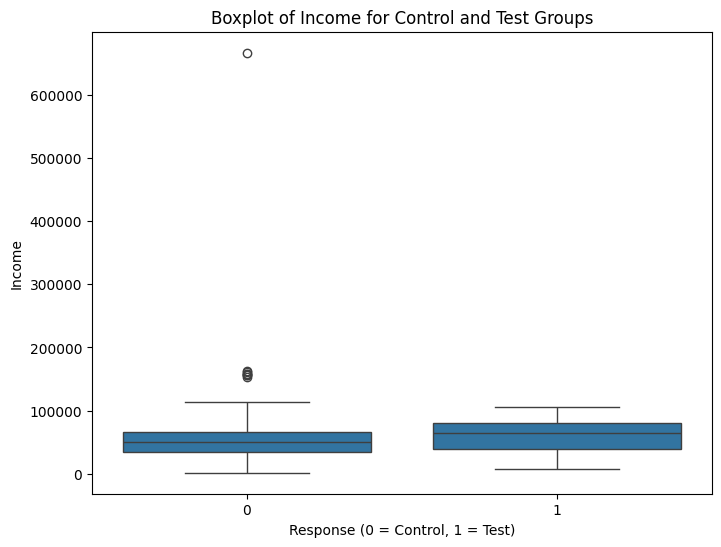

In [ ]:
# Plotting boxplots of Income for Control and Test groups
plt.figure(figsize=(8, 6))
sns.boxplot(x='Response', y='Income', data=df)
plt.title('Boxplot of Income for Control and Test Groups')
plt.xlabel('Response (0 = Control, 1 = Test)')
plt.ylabel('Income')
plt.show()


In [ ]:
# Create a contingency table for the Response and Marital_Status columns
contingency_table = pd.crosstab(df['Response'], df['Marital_Status'])

# Perform the Chi-Squared test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Squared Statistic: {chi2_stat}")
print(f"P-value: {p_val}")



Chi-Squared Statistic: 54.24163670555137
P-value: 2.106747054090692e-09


In [ ]:
import numpy as np

# Calculate the mean difference between the groups
mean_diff = np.mean(test_income) - np.mean(control_income)

# Calculate the standard error of the difference
se_diff = np.sqrt(np.var(control_income)/len(control_income) + np.var(test_income)/len(test_income))

# 95% Confidence Interval
ci_low = mean_diff - 1.96 * se_diff
ci_high = mean_diff + 1.96 * se_diff

print(f"95% Confidence Interval: ({ci_low}, {ci_high})")


95% Confidence Interval: (6634.1524058214545, 12106.933411807115)


In [ ]:
# Calculate the pooled standard deviation
pooled_std = np.sqrt(((len(control_income) - 1) * np.var(control_income) +
                      (len(test_income) - 1) * np.var(test_income)) /
                     (len(control_income) + len(test_income) - 2))

# Calculate Cohen's D
cohens_d = mean_diff / pooled_std

print(f"Cohen's D: {cohens_d}")


Cohen's D: 0.3756588036248889


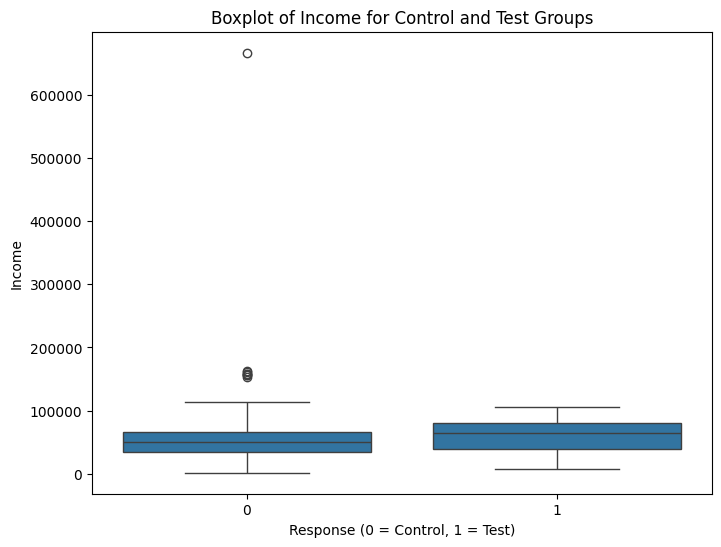

In [ ]:
# Plotting boxplots of Income for Control and Test groups
plt.figure(figsize=(8, 6))
sns.boxplot(x='Response', y='Income', data=df)
plt.title('Boxplot of Income for Control and Test Groups')
plt.xlabel('Response (0 = Control, 1 = Test)')
plt.ylabel('Income')
plt.show()
